# Лабораторная работа №3  
## Методы численного решения нелинейных уравнений  
### Графики сходимости (log₁₀|xₙ₊₁ − xₙ|)

**Вариант:** IV.12.3 (a, ж), IV.12.4 (a), IV.12.6 (д)  
**Методы:**  
0. Метод половинного деления  
1. Метод простой итерации  
2. Метод Ньютона (и модифицированный вариант)

---


In [1]:

import numpy as np
import matplotlib.pyplot as plt
from math import sin, cos, tan
from scipy.optimize import fsolve

# --- Метод половинного деления с логированием ---
def bisection_convergence(f, a, b, eps=1e-6):
    if f(a)*f(b) > 0:
        raise ValueError("На концах интервала должны быть значения разного знака")
    logs, it = [], 0
    while (b - a)/2 > eps:
        c = (a + b)/2
        if f(c) == 0:
            break
        if f(a)*f(c) < 0:
            b = c
        else:
            a = c
        logs.append(abs(b - a))
        it += 1
    return (a + b)/2, logs

# --- Метод простой итерации ---
def simple_iteration_convergence(phi, x0, eps=1e-6, max_iter=1000):
    x = x0
    logs = []
    for _ in range(max_iter):
        x_next = phi(x)
        logs.append(abs(x_next - x))
        if abs(x_next - x) < eps:
            break
        x = x_next
    return x, logs

# --- Метод Ньютона ---
def newton_convergence(f, df, x0, eps=1e-6, max_iter=100):
    x = x0
    logs = []
    for _ in range(max_iter):
        x_next = x - f(x)/df(x)
        logs.append(abs(x_next - x))
        if abs(x_next - x) < eps:
            break
        x = x_next
    return x, logs

# --- Многомерный метод Ньютона для систем ---
def newton_system_convergence(F, J, X0, eps=1e-6, max_iter=100):
    X = np.array(X0, dtype=float)
    logs = []
    for _ in range(max_iter):
        delta = np.linalg.solve(J(X), -np.array(F(X)))
        X_next = X + delta
        logs.append(np.linalg.norm(X_next - X))
        if np.linalg.norm(X_next - X) < eps:
            break
        X = X_next
    return X, logs


/var/folders/7y/8_qdyw1x0570p135qdb9jgn40000gn/T/ipykernel_78056/2736622405.py:15: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(logs_iter), label='Метод простой итерации')
/var/folders/7y/8_qdyw1x0570p135qdb9jgn40000gn/T/ipykernel_78056/2736622405.py:16: RuntimeWarning: divide by zero encountered in log10
  plt.plot(np.log10(logs_newton), label='Метод Ньютона')


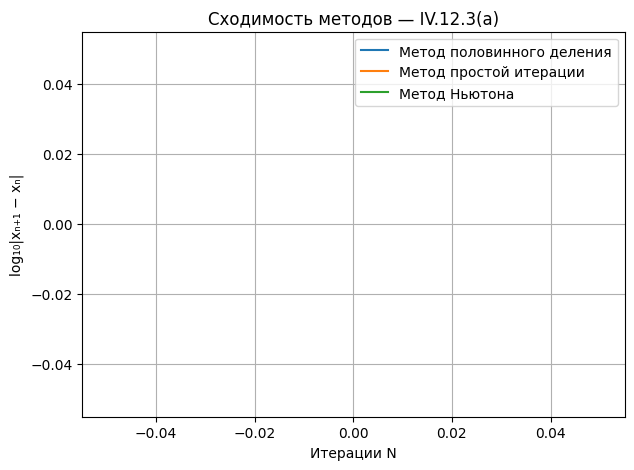

In [2]:

# --- IV.12.3(a): 2x² + 5x - 3 = 0 ---
f1 = lambda x: 2*x**2 + 5*x - 3
df1 = lambda x: 4*x + 5
phi1 = lambda x: np.sqrt((3 - 5*x)/2) if (3 - 5*x) >= 0 else x

# Половинное деление
_, logs_bis = bisection_convergence(f1, -4, -2)
# Простая итерация
_, logs_iter = simple_iteration_convergence(phi1, 0.5)
# Ньютон
_, logs_newton = newton_convergence(f1, df1, -3)

plt.figure(figsize=(7,5))
plt.plot(np.log10(logs_bis), label='Метод половинного деления')
plt.plot(np.log10(logs_iter), label='Метод простой итерации')
plt.plot(np.log10(logs_newton), label='Метод Ньютона')
plt.xlabel('Итерации N')
plt.ylabel('log₁₀|xₙ₊₁ − xₙ|')
plt.title('Сходимость методов — IV.12.3(a)')
plt.grid(True)
plt.legend()
plt.show()


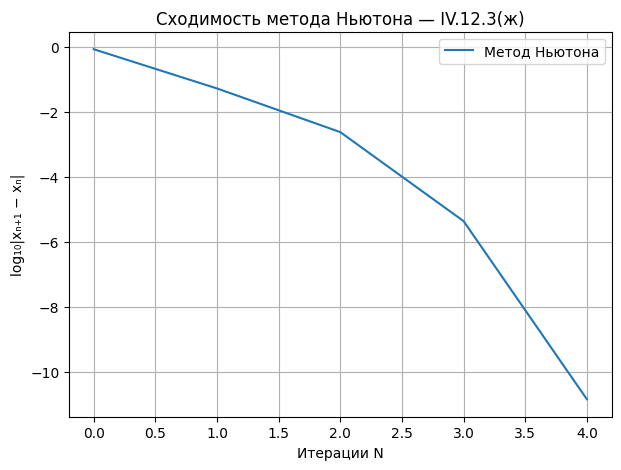

In [3]:

# --- IV.12.3(ж): 2tan(x) - x/2 + 1 = 0 ---
f2 = lambda x: 2*np.tan(x) - x/2 + 1
df2 = lambda x: 2/(np.cos(x)**2) - 0.5

_, logs_newton2 = newton_convergence(f2, df2, 0.2)

plt.figure(figsize=(7,5))
plt.plot(np.log10(logs_newton2), label='Метод Ньютона')
plt.xlabel('Итерации N')
plt.ylabel('log₁₀|xₙ₊₁ − xₙ|')
plt.title('Сходимость метода Ньютона — IV.12.3(ж)')
plt.grid(True)
plt.legend()
plt.show()


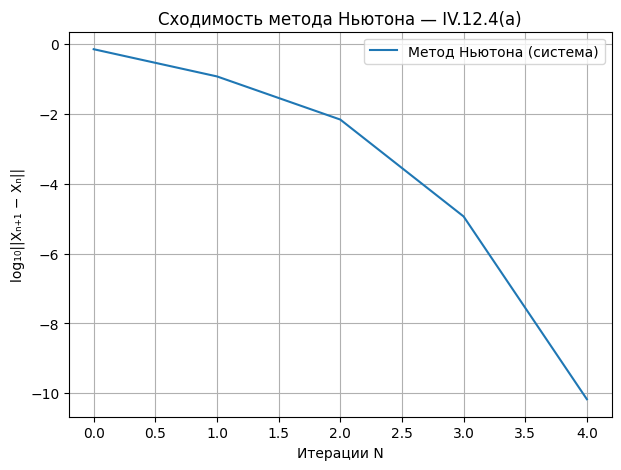

In [4]:

# --- IV.12.4(a) ---
F = lambda X: [np.sin(X[0] + 1) - X[1] - 1.2,
               2*X[0] + np.cos(X[1]) - 2]
J = lambda X: np.array([[np.cos(X[0] + 1), -1],
                        [2, -np.sin(X[1])]])

_, logs_sys1 = newton_system_convergence(F, J, [0.5, 0.5])

plt.figure(figsize=(7,5))
plt.plot(np.log10(logs_sys1), label='Метод Ньютона (система)')
plt.xlabel('Итерации N')
plt.ylabel('log₁₀||Xₙ₊₁ − Xₙ||')
plt.title('Сходимость метода Ньютона — IV.12.4(a)')
plt.grid(True)
plt.legend()
plt.show()


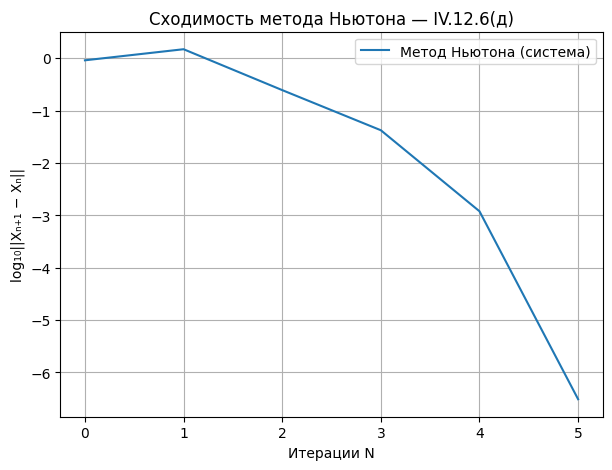

In [5]:

# --- IV.12.6(д) ---
F = lambda X: [X[0]**7 - 5*X[0]**2*X[1]**4 + 1510,
               X[1]**3 - 3*X[0]**4*X[1] - 105]
J = lambda X: np.array([[7*X[0]**6 - 10*X[0]*X[1]**4, -20*X[0]**2*X[1]**3],
                        [-12*X[0]**3*X[1], 3*X[1]**2 - 3*X[0]**4]])

_, logs_sys2 = newton_system_convergence(F, J, [2, 3])

plt.figure(figsize=(7,5))
plt.plot(np.log10(logs_sys2), label='Метод Ньютона (система)')
plt.xlabel('Итерации N')
plt.ylabel('log₁₀||Xₙ₊₁ − Xₙ||')
plt.title('Сходимость метода Ньютона — IV.12.6(д)')
plt.grid(True)
plt.legend()
plt.show()
